# Supervised Learning Coursework 1 Coding Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

##### Initialise condition for question a

In [2]:
data_x = np.array([1, 2, 3, 4])
data_y = np.array([3, 2, 0, 5])

### Part 1

#### Question 1

In [3]:

def extract_features(x, degree):
    return np.array([x**i for i in range(degree + 1)]).T

def linear_regression(X, y):
    return np.linalg.solve(X.T @ X, X.T @ y)

##### Question 1a

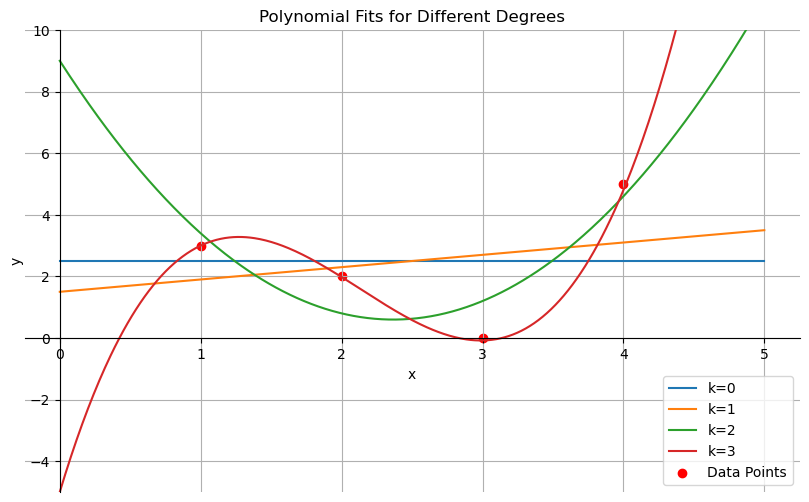

In [4]:
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 5, 500)

for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    X_plot = extract_features(x_plot, degree)
    y_plot = X_plot @ coeffs
    plt.plot(x_plot, y_plot, label=f'k={degree}')

plt.scatter(data_x, data_y, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-5, 10)
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

##### Question 1b

In [5]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y).round(2)
    print(f"Degree {degree+1} polynomial coefficients: {coeffs}")

Degree 1 polynomial coefficients: [2.5]
Degree 2 polynomial coefficients: [1.5 0.4]
Degree 3 polynomial coefficients: [ 9.  -7.1  1.5]
Degree 4 polynomial coefficients: [-5.   15.17 -8.5   1.33]


##### Question 1c

In [6]:
for degree in range(0, 4):
    X = extract_features(data_x, degree)
    coeffs = linear_regression(X, data_y)
    coeffs = coeffs.round(2)
    y_pred = X @ coeffs
    print(y_pred)
    mse = np.mean((data_y - y_pred) ** 2)
    print(f"MSE for k={degree}: {mse}")

[2.5 2.5 2.5 2.5]
MSE for k=0: 3.25
[1.9 2.3 2.7 3.1]
MSE for k=1: 3.0500000000000003
[3.4 0.8 1.2 4.6]
MSE for k=2: 0.8
[ 3.    1.98 -0.08  4.8 ]
MSE for k=3: 0.011699999999998757


#### Question 2

##### Question 2a i

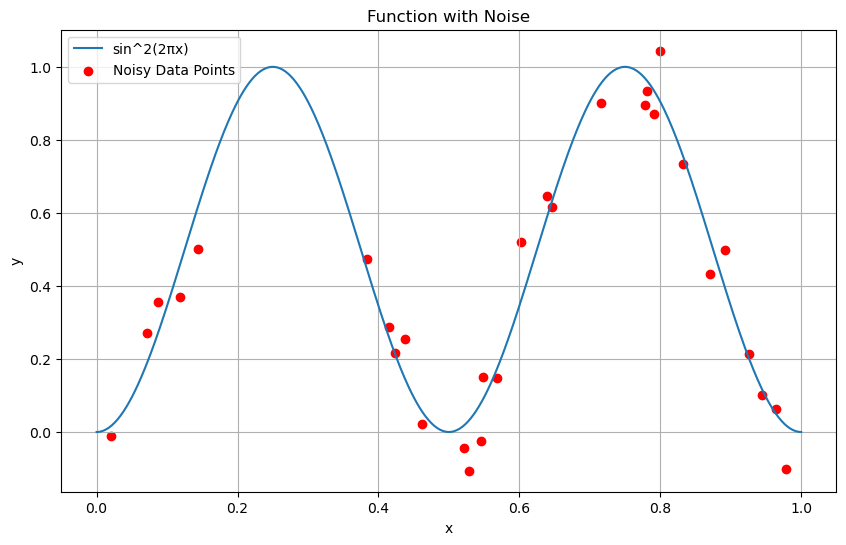

In [7]:
def g_sigma(x, sigma):
    noise = np.random.normal(0, sigma, size=len(x))
    return np.sin(2 * np.pi * x)**2 + noise

# 生成数据并绘图
np.random.seed(0)
x_sample = np.random.uniform(0,1,30)
y_sample = g_sigma(x_sample, sigma=0.07)

x_plot = np.linspace(0, 1, 500)
y_plot = np.sin(2 * np.pi * x_plot)**2

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='sin^2(2πx)')
plt.scatter(x_sample, y_sample, color='red', label='Noisy Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function with Noise')
plt.legend()
plt.grid(True)
plt.show()

##### Question 2a ii

[0.21898562 0.26755591]
[ -0.29115598  11.87052943 -56.73239941  94.74710189 -50.21479299]
[-5.83010006e-01  4.03517236e+01 -7.18253420e+02  6.25582723e+03
 -2.79471854e+04  6.94555635e+04 -1.00358054e+05  8.39557796e+04
 -3.77415987e+04  7.05789550e+03]
[ 1.04402724e-01 -1.46061915e+01  5.75342163e+02 -7.40989663e+03
  4.78132268e+04 -1.66830645e+05  3.04805187e+05 -2.03077953e+05
 -2.07367161e+05  4.20668396e+05 -8.59873993e+04 -2.94986107e+05
  2.59233179e+05 -6.74223261e+04]
[ 2.65483537e+00 -2.32391383e+02  6.44566741e+03 -8.26867190e+04
  5.83201641e+05 -2.43030402e+06  6.10175178e+06 -8.83553881e+06
  6.01550054e+06 -1.31167073e+05  1.13945904e+05 -4.40980639e+06
  3.35875918e+06 -1.44413105e+06  7.13672254e+06 -1.16802430e+07
  7.38702031e+06 -1.68924310e+06]


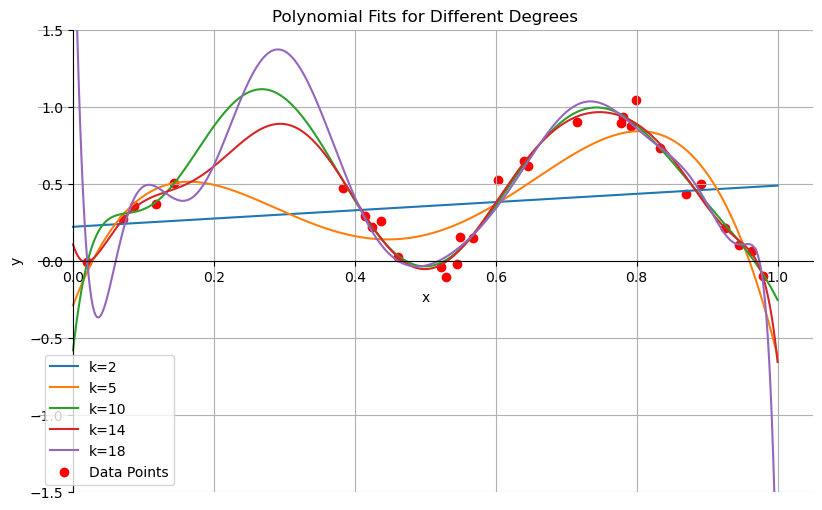

In [8]:
degrees = [2, 5, 10, 14, 18]
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0, 1, 500)
for degree in degrees:
    X = extract_features(x_sample, degree-1)
    coeffs = linear_regression(X, y_sample)
    X_plot = extract_features(x_plot, degree-1)
    y_plot = X_plot @ coeffs
    print(coeffs)
    plt.plot(x_plot, y_plot, label=f'k={degree}')


plt.scatter(x_sample, y_sample, color='red', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits for Different Degrees')
plt.legend()
plt.grid(True)
plt.ylim(-1.5, 1.5)
ax = plt.gca()
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


##### Question 2b

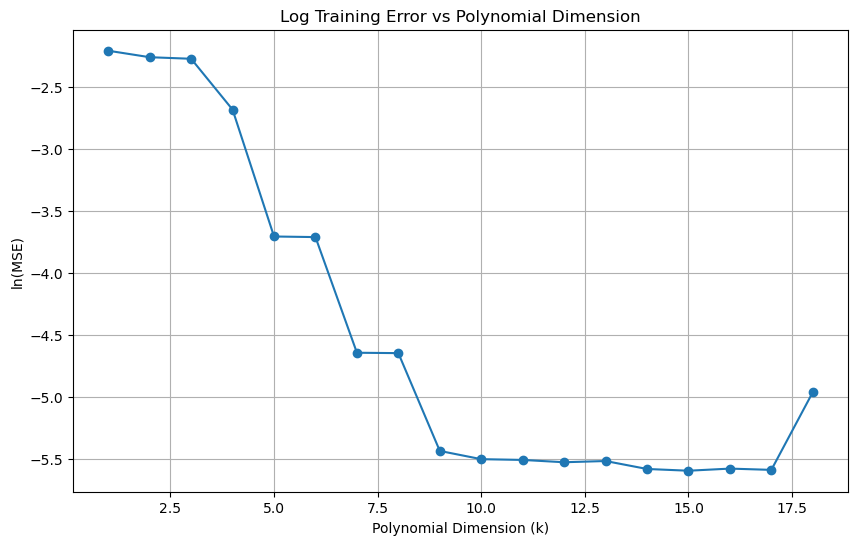

[0.11016059267511437, 0.10454125964535367, 0.10323129769651546, 0.06846669184721318, 0.024593773949301408, 0.024474908924098957, 0.00962299238367968, 0.009592818596375483, 0.004356098768126103, 0.004076219204307841, 0.0040510957558706154, 0.003976123246084957, 0.004015417509929201, 0.003765879975113241, 0.003713172979117746, 0.003777309834233292, 0.0037385259297945585, 0.007001480020389974]


In [9]:
training_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    y_pred = X @ coeffs
    mse = np.mean((y_sample-y_pred)**2)
    training_errors.append(mse)
plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(training_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Training Error vs Polynomial Dimension')
plt.grid(True)
plt.show()
print(training_errors)

##### Question 2c

0.13998371041228042
0.15499435775907308
0.150800627027078
0.2368076933092295
0.08277373876780048
0.08396515828467312
0.009298171946848227
0.010374713447662718
0.010284011466806275
0.011918281355795717
0.009682441225570609
0.009701749880883556
0.032625809466721806
0.016498937505480468
0.01797783441508384
0.016423449586162486
0.017025307647450177
0.08942382330723843


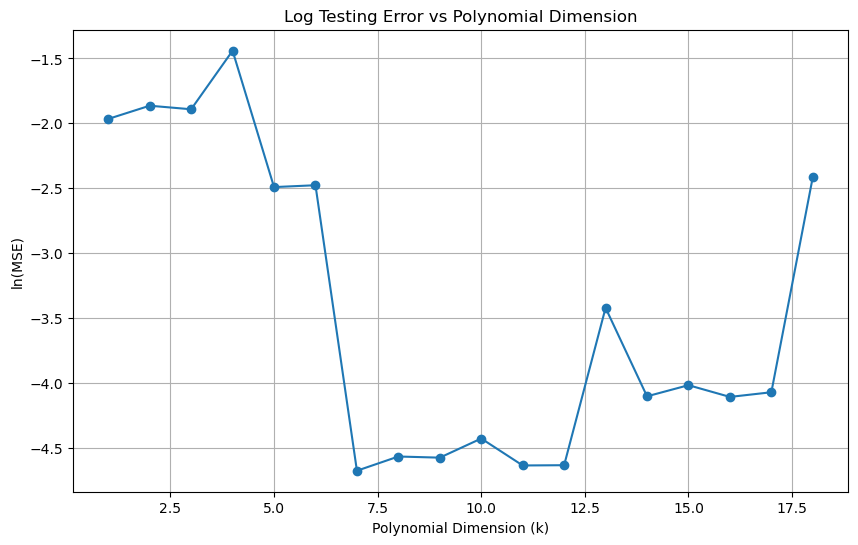

In [10]:
np.random.seed(0)
x_test = np.random.uniform(0,1,1000)
y_test = g_sigma(x_test, sigma=0.07)

testing_errors = []
degrees = [i for i in range(1,19)]
for degree in range(0,18):
    X = extract_features(x_sample, degree)
    coeffs = linear_regression(X, y_sample)
    X = extract_features(x_test, degree)
    y_pred = X @ coeffs
    mse = np.mean((y_test-y_pred)**2)
    testing_errors.append(mse)
for i in testing_errors:
    print(i)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.show()




##### Question 2d

0.13998371041228058
0.1549943577590728
0.15080062702707775
0.23680769330922996
0.08277373876780031
0.08396515828467326
0.009298171946848231
0.010374713447662715
0.010284011466806266
0.011918281355795719
0.009682441225570606
0.009701749880883568
0.03262580946672187
0.01649893750548048
0.01797783441508383
0.01642344958616253
0.017025307647450198
0.08942382330723853


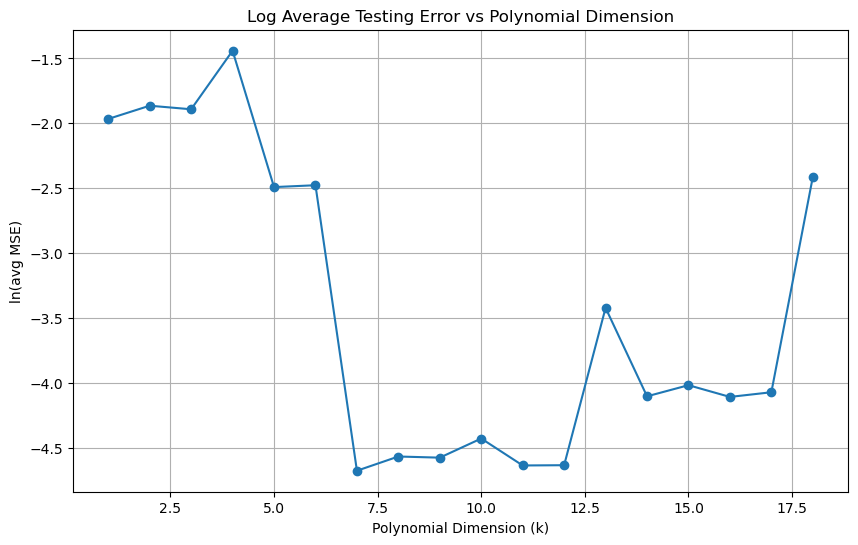

In [11]:
total_testing_errors = [0 for i in range(18)]
for experiment in range(100):
    np.random.seed(experiment)
    sub_x_sample = np.random.uniform(0,1,30)
    sub_y_sample = g_sigma(sub_x_sample, sigma=0.07)
    for degree in range(0,18):
        X = extract_features(sub_x_sample, degree)
        coeffs = linear_regression(X, sub_y_sample)
        X = extract_features(x_test, degree)
        y_pred = X @ coeffs
        mse = np.mean((y_test-y_pred)**2)
        testing_errors.append(mse)
    total_testing_errors  = [x + y for x, y in zip(total_testing_errors, testing_errors)]
average_testing_errors = [x/100 for x in total_testing_errors]
plt.figure(figsize=(10, 6))
for i in average_testing_errors:
    print(i)
plt.plot([i for i in range(1,19)], np.log(average_testing_errors), marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Polynomial Dimension')
plt.grid(True)
plt.show()

#### Question 3


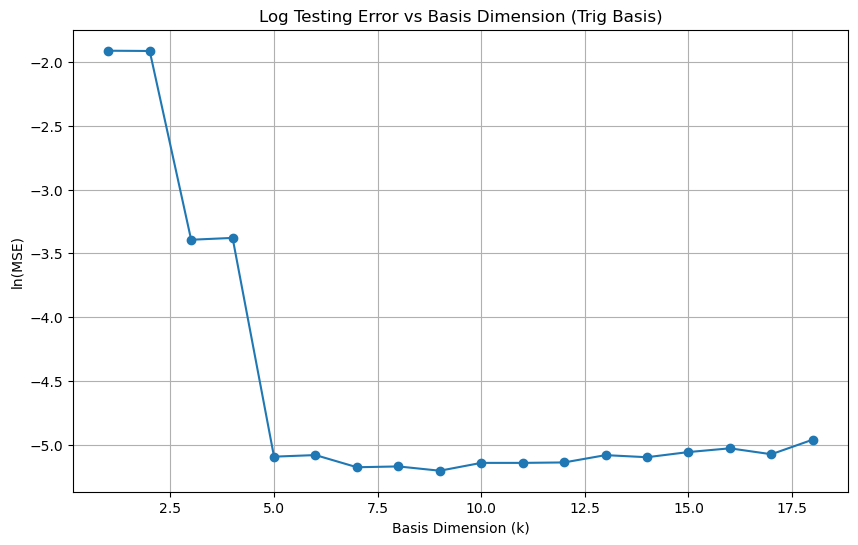

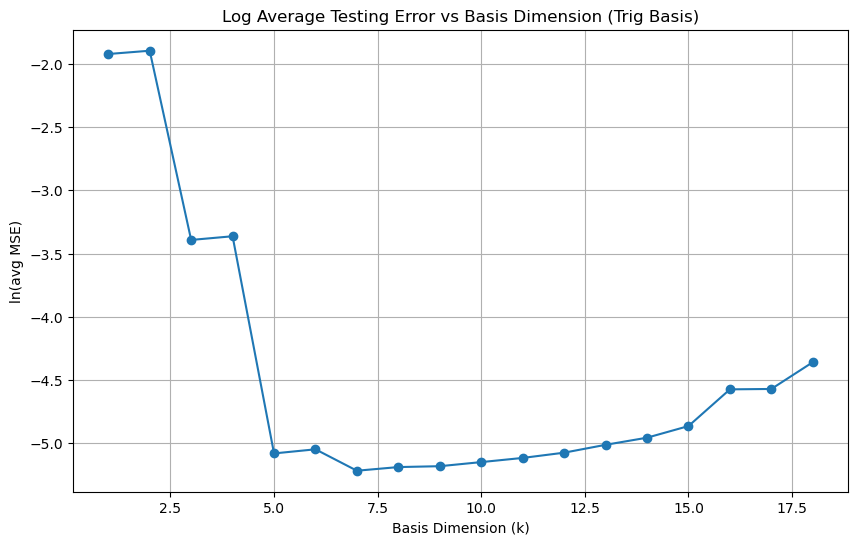

In [12]:
def extract_features_trig(x, degree):
    return np.column_stack([np.sin((i + 1) * np.pi * x) for i in range(degree)])
np.random.seed(0)


x_test = np.random.uniform(0, 1, 1000)
y_test = g_sigma(x_test, sigma=0.07)


n_experiments = 100 
degrees = [i for i in range(1, 19)]  

x_sample = np.random.uniform(0, 1, 50)
y_sample = g_sigma(x_sample, sigma=0.07)

testing_errors = []

for degree in degrees:
    X_train = extract_features_trig(x_sample, degree)
    coeffs = linear_regression(X_train, y_sample)
    
    X_test = extract_features_trig(x_test, degree)
    y_pred = X_test @ coeffs
    mse = np.mean((y_test - y_pred) ** 2)
    testing_errors.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(MSE)')
plt.title('Log Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()


testing_errors_all = []

for experiment in range(n_experiments):
   
    x_sample = np.random.uniform(0, 1, 50)
    y_sample = g_sigma(x_sample, sigma=0.07)
  
    testing_errors = []
    
    for degree in degrees:
       
        X_train = extract_features_trig(x_sample, degree)
        coeffs = linear_regression(X_train, y_sample)
        
        # 提取测试特征并计算误差
        X_test = extract_features_trig(x_test, degree)
        y_pred = X_test @ coeffs
        mse = np.mean((y_test - y_pred) ** 2)
        testing_errors.append(mse)
    
    testing_errors_all.append(testing_errors)

average_testing_errors = np.mean(testing_errors_all, axis=0)


plt.figure(figsize=(10, 6))
plt.plot(degrees, np.log(average_testing_errors), marker='o')
plt.xlabel('Basis Dimension (k)')
plt.ylabel('ln(avg MSE)')
plt.title('Log Average Testing Error vs Basis Dimension (Trig Basis)')
plt.grid(True)
plt.show()

### Question 4


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
csv_link = "http://www.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"

data = pd.read_csv(csv_link)

display(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1] 
results = {"method": [], "train_mse": [], "test_mse": []}
# Define number of runs
num_runs = 20
temp = 0
for _ in range(num_runs):
    # Split data into training and testing sets (2/3 for training, 1/3 for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=None)

    # (a) Predicting with the mean y-value on the training set
    ones_train = np.ones_like(y_train).reshape(-1, 1)
    ones_test = np.ones_like(y_test).reshape(-1, 1)

    w_naive = linear_regression(ones_train, y_train)

    y_train_pred_naive = ones_train@w_naive
    y_test_pred_naive = ones_test@w_naive

    t = np.mean(y_train)
    if temp != 0:
        temp += t
        temp /= 2
    else:
        temp = t

    train_mse_naive = np.mean((y_train - y_train_pred_naive) ** 2)
    test_mse_naive = np.mean((y_test - y_test_pred_naive) ** 2)

    results["method"].append("Mean Baseline")
    results["train_mse"].append(train_mse_naive)
    results["test_mse"].append(test_mse_naive)

    # (b) Predicting with a single attribute and a bias term
    for i in range(X.shape[1]):
        X_single_train = X_train.iloc[:, i].values.reshape(-1, 1)
        X_single_test = X_test.iloc[:, i].values.reshape(-1, 1)

        model = LinearRegression()
        model.fit(X_single_train, y_train)

        y_train_pred_b = model.predict(X_single_train)
        y_test_pred_b = model.predict(X_single_test)

        train_mse_b = mean_squared_error(y_train, y_train_pred_b)
        test_mse_b = mean_squared_error(y_test, y_test_pred_b)

        results["method"].append(f"Single Attribute {i+1}")
        results["train_mse"].append(train_mse_b)
        results["test_mse"].append(test_mse_b)

    # (c) Predicting with all attributes
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred_c = model.predict(X_train)
    y_test_pred_c = model.predict(X_test)

    train_mse_c = mean_squared_error(y_train, y_train_pred_c)
    test_mse_c = mean_squared_error(y_test, y_test_pred_c)

    results["method"].append("All Attributes")
    results["train_mse"].append(train_mse_c)
    results["test_mse"].append(test_mse_c)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Aggregate results over all runs
average_results = results_df.groupby("method").mean().reset_index()
print(average_results)


                 method  train_mse   test_mse
0        All Attributes  21.648688  25.734617
1         Mean Baseline  85.669962  82.235101
2    Single Attribute 1  72.720983  70.879323
3   Single Attribute 10  67.163625  63.822649
4   Single Attribute 11  62.940543  62.428705
5   Single Attribute 12  38.885055  37.879981
6    Single Attribute 2  74.285923  72.194947
7    Single Attribute 3  65.856939  62.697617
8    Single Attribute 4  83.197605  79.745272
9    Single Attribute 5  70.300634  66.814653
10   Single Attribute 6  42.500877  46.514814
11   Single Attribute 7  73.678157  70.372699
12   Single Attribute 8  80.376949  77.248915
13   Single Attribute 9  73.488715  69.917492


In [31]:
# Naive Regression Implementation
ones_train = np.ones_like(y_train).reshape(-1, 1)
ones_test = np.ones_like(y_test).reshape(-1, 1)

model_naive = LinearRegression()
model_naive.fit(ones_train, y_train)

y_train_pred_naive = model_naive.predict(ones_train)
y_test_pred_naive = model_naive.predict(ones_test)

train_mse_naive = mean_squared_error(y_train, y_train_pred_naive)
test_mse_naive = mean_squared_error(y_test, y_test_pred_naive)

results["method"].append("Naive Regression")
results["train_mse"].append(train_mse_naive)
results["test_mse"].append(test_mse_naive)
results_df = pd.DataFrame(results)

# Aggregate results over all runs
average_results = results_df.groupby("method").mean().reset_index()
print(average_results)


                 method  train_mse   test_mse
0        All Attributes  21.806457  25.411252
1         Mean Baseline  84.612317  84.290805
2      Naive Regression  82.829909  87.931131
3    Single Attribute 1  71.985103  72.479122
4   Single Attribute 10  66.473366  65.091009
5   Single Attribute 11  62.380058  63.636216
6   Single Attribute 12  38.686242  38.372011
7    Single Attribute 2  73.747474  73.340786
8    Single Attribute 3  65.226132  63.963430
9    Single Attribute 4  81.542596  83.293643
10   Single Attribute 5  69.927848  67.549007
11   Single Attribute 6  43.251489  44.672555
12   Single Attribute 7  73.201750  71.339624
13   Single Attribute 8  79.674940  78.621119
14   Single Attribute 9  72.663666  71.459332


In [32]:
for i in range(X.shape[1]):
    X_single_train = X_train.iloc[:, i].values.reshape(-1, 1)
    X_single_test = X_test.iloc[:, i].values.reshape(-1, 1)

    model_single = LinearRegression()
    model_single.fit(X_single_train, y_train)

    y_train_pred_single = model_single.predict(X_single_train)
    y_test_pred_single = model_single.predict(X_single_test)

    train_mse_single = mean_squared_error(y_train, y_train_pred_single)
    test_mse_single = mean_squared_error(y_test, y_test_pred_single)

    results["method"].append(f"Single Attribute {i+1}")
    results["train_mse"].append(train_mse_single)
    results["test_mse"].append(test_mse_single)
average_results = results_df.groupby("method").mean().reset_index()
print(average_results)

                 method  train_mse   test_mse
0        All Attributes  21.806457  25.411252
1         Mean Baseline  84.612317  84.290805
2      Naive Regression  82.829909  87.931131
3    Single Attribute 1  71.985103  72.479122
4   Single Attribute 10  66.473366  65.091009
5   Single Attribute 11  62.380058  63.636216
6   Single Attribute 12  38.686242  38.372011
7    Single Attribute 2  73.747474  73.340786
8    Single Attribute 3  65.226132  63.963430
9    Single Attribute 4  81.542596  83.293643
10   Single Attribute 5  69.927848  67.549007
11   Single Attribute 6  43.251489  44.672555
12   Single Attribute 7  73.201750  71.339624
13   Single Attribute 8  79.674940  78.621119
14   Single Attribute 9  72.663666  71.459332


In [42]:
model_all = LinearRegression()
model_all.fit(X_train, y_train)

y_train_pred_all = model_all.predict(X_train)
y_test_pred_all = model_all.predict(X_test)

train_mse_all = mean_squared_error(y_train, y_train_pred_all)
test_mse_all = mean_squared_error(y_test, y_test_pred_all)

results["method"].append("All Attributes")
results["train_mse"].append(train_mse_all)
results["test_mse"].append(test_mse_all)
average_results = results_df.groupby("method").mean().reset_index()
average_results = average_results.sort_values("test_mse")
print(average_results)

                 method  train_mse   test_mse
0        All Attributes  21.806457  25.411252
6   Single Attribute 12  38.686242  38.372011
11   Single Attribute 6  43.251489  44.672555
5   Single Attribute 11  62.380058  63.636216
8    Single Attribute 3  65.226132  63.963430
4   Single Attribute 10  66.473366  65.091009
10   Single Attribute 5  69.927848  67.549007
12   Single Attribute 7  73.201750  71.339624
14   Single Attribute 9  72.663666  71.459332
3    Single Attribute 1  71.985103  72.479122
7    Single Attribute 2  73.747474  73.340786
13   Single Attribute 8  79.674940  78.621119
9    Single Attribute 4  81.542596  83.293643
1         Mean Baseline  84.612317  84.290805
2      Naive Regression  82.829909  87.931131


# PART 2 

## 2.1 K-Nearest Neighbors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 2.1.1 Generating the Data

In [ ]:
np.random.seed(77)
S = 100
X = np.random.rand(S, 2)
y = np.random.choice([0, 1], size = S)

def h_S_v(x_S, y_S, x, v):
    distances = np.linalg.norm(x_S - x, axis=1)
    nearest_indices = np.argsort(distances)[:v]
    nearest_labels = y_S[nearest_indices]

    return np.bincount(nearest_labels).argmax()

def plot_boundary(x_S, y_S, v, resolution=200):

    # Build Grid
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), np.linspace(y_min, y_max, resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    predictions = np.array([h_S_v(x_S, y_S, point, v) for point in grid_points])
    Z = predictions.reshape(xx.shape)

    custom_cmap = ListedColormap(['white', 'turquoise'])
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha = 0.5, cmap = custom_cmap)
    plt.scatter(x_S[y_S == 0][:,0], x_S[y_S == 0][:,1], c = 'green', label = "Label 0")
    plt.scatter(x_S[y_S == 1][:,0], x_S[y_S == 1][:,1], c = 'blue', label = "Label 1")
    plt.title("Figure of h_{S,v}")
    plt.legend()
    plt.show()

plot_boundary(X, y , v = 3)


### 2.1.2 Estimated generalization error of k-NN as a function of k

In [ ]:
def generate_noise(S, v=3, size=1000, noise_prob=0.2):
    x_S, y_S = S
    X = np.random.rand(size, 2)
    y = []
    for x in X:
        if np.random.rand() > noise_prob:
            y.append(h_S_v(x_S, y_S, x, v))
        else:
            y.append(np.random.choice([0,1]))
    return X, np.array(y)

def generalize_err(S, k_values, runs = 100, train_size = 1000, test_size = 1000):
    mean_errors = []
    for k in k_values:
        errors = []
        for _ in range(runs):
            
